In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('datasets_530213_971167_Advertising.csv')
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

lr = LinearRegression()
lr.fit(X_train, y_train)
X_train.isnull().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

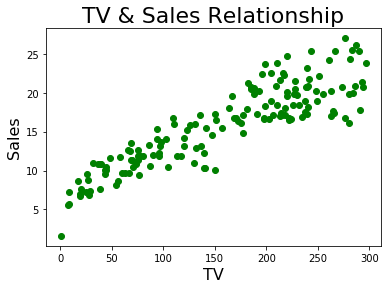

In [4]:
plt.scatter(X_train['TV'], y_train, color='g')
plt.xlabel('TV', size=16)
plt.ylabel('Sales', size=16)
plt.title('TV & Sales Relationship', size=22)
plt.show()

# Little or no Multicollinearity between the features:


(3.0, 0.0)

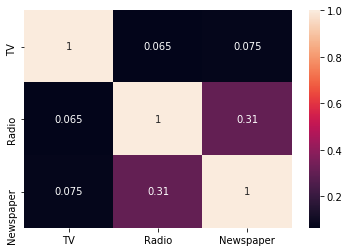

In [12]:
ax = sns.heatmap(X_train.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

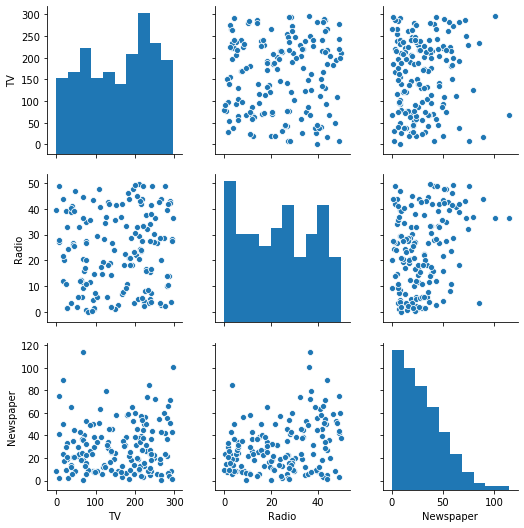

In [13]:
sns.pairplot(X_train)

##### Why removing highly correlated features is important?
The interpretation of a regression coefficient is that it represents the mean change in the target for each unit change in an feature when you hold all of the other features constant. However, when features are correlated, changes in one feature in turn shifts another feature/features. The stronger the correlation, the more difficult it is to change one feature without changing another. It becomes difficult for the model to estimate the relationship between each feature and the target independently because the features tend to change in unison.

##### How multicollinearity can be treated?
If we have 2 features which are highly correlated we can drop one feature or combine the 2 features to form a new feature,which can further be used for prediction.

### Homoscedasticity Assumption

In [14]:
from yellowbrick.regressor import ResidualsPlot

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
lr = LinearRegression()

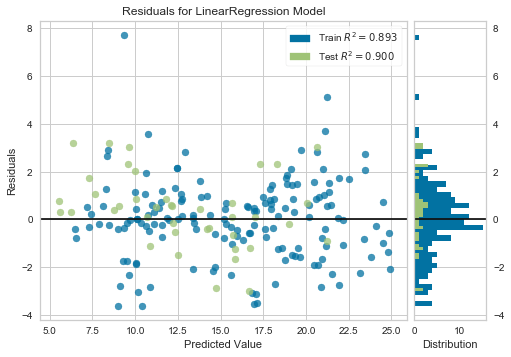

In [19]:
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()
visualizer.poof()
plt.show()

#### Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance 
in the relationship between the features and the target) is the same across all values of the independent variables.A scatter plot of residual values vs predicted values is a goodway to check for homoscedasticity.There should be no clear pattern in the distribution and if there is a specific pattern,the data is heteroscedastic.


## Normal distribution of error terms:

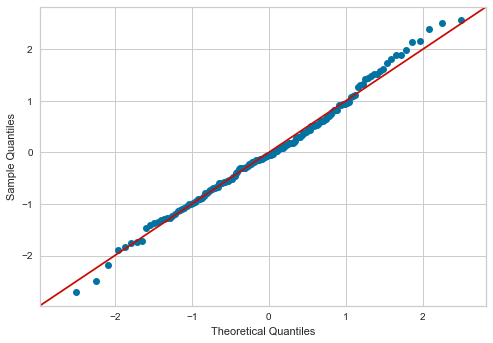

In [21]:
import statsmodels.api as sm
mod_fit = sm.OLS(y_train, X_train).fit()
res = mod_fit.resid
fig = sm.qqplot(res,fit=True, line='45')
plt.show()

The q-q plot of the advertising data set shows that the errors(residuals) are fairly normally distributed.

In [22]:
print(mod_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2329.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                   6.92e-130
Time:                        16:19:54   Log-Likelihood:                         -371.32
No. Observations:                 160   AIC:                                      748.6
Df Residuals:                     157   BIC:                                      757.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------